In [5]:
import daft
from daft import PGM
import matplotlib.pyplot as plt

pgm = PGM(shape=[3,4])

<function matplotlib.pyplot.show(close=None, block=None)>

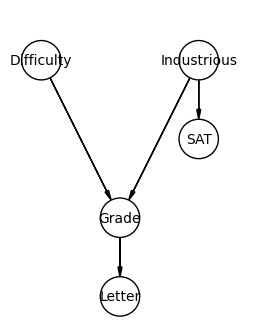

In [6]:
pgm.add_node(daft.Node('D', 'Difficulty' ,1,4))
pgm.add_node(daft.Node('I','Industrious', 3,4))
pgm.add_node(daft.Node('G', 'Grade',2,2))
pgm.add_node(daft.Node('S','SAT' ,3,3))
pgm.add_node(daft.Node('L','Letter', 2,1))

pgm.add_edge('D', 'G')
pgm.add_edge('I', 'G')
pgm.add_edge('I', 'S')
pgm.add_edge('G', 'L')

pgm.render()
plt.show

In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD as t
model = BayesianNetwork([
    ('Difficulty', 'Grade'),
    ('Industriousness', 'Grade'),
    ('Industriousness', 'SAT'),
    ('Grade', 'Letter')])

In [8]:
def cpd(variableName, variableCard, valueList, evidence = None, evidenceCard = None):
    cpd = t(variable= variableName, variable_card=variableCard, 
            values=valueList, evidence= evidence, evidence_card=evidenceCard)
    return cpd

cpdDif = cpd('Difficulty', 2, [[.6],[.4]])
cpdInd = cpd('Industriousness', 2, [[.7], [.3]])
cpdSAT = cpd('SAT', 2, [[.95,.2], [.05, .8]], ['Industriousness'], [2])
cpdGrd = cpd('Grade', 3, [[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]], ['Industriousness', 'Difficulty'], [2,2])
cpdLet = cpd('Letter', 2, [[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]], ['Grade'], [3])

In [9]:
model.add_cpds(cpdDif, cpdInd, cpdSAT, cpdGrd, cpdLet)
model.check_model()

True